# Vancouver Crime Data

For my project while at The Data Incubator, I've decided to do an analysis of the crimes reported in **Vancouver, BC** to the **Vancouver Police Department (VPD)**.

I've been living in Vancouver for the past 2.5 years and it only seems fit that I choose a dataset related to this city. Vancouver is consistently ranked within the **Top 3** livable cities in the world, however, it still faces its challenges related to number of crimes.

The data was obtained from the [Open Data Catalouge](http://data.vancouver.ca/datacatalogue/crime-data.htm "Crime Data") by [VPD](http://vancouver.ca/police/ "Vancouver Police Department")

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing Data

The data in the form of a csv file contained in a zip file. For this analysis, I've dropped the data from the current year 2018 for sake of simplicity.
The attributes for this dataset are:
* TYPE: The type of crime activities
* YEAR: A four-digit field that indicates the year when the reported crime activity occurred
* MONTH: A numeric field that indicates the month when the reported crime activity occurred
* DAY: A two-digit field that indicates the day of the month when the reported crime activity occurred
* HOUR: A two-digit field that indicates the hour time (in 24 hours format) when the reported crime activity occurred
* MINUTE: A two-digit field that indicates the minute when the reported crime activity occurred
* HUNDRED_BLOCK: Generalized location of the report crime activity
* NEIGHBOURHOOD: The Vancouver Police Department uses the Statistics Canada definition of neighbourhoods within municipalities. Neighbourhoods within the City of Vancouver are based on the census tract (CT) concept within census metropolitan area (CMA).
* X: Coordinate values are projected in UTM Zone 10.
* Y: Coordinate values are projected in UTM Zone 10.


In [84]:
df = pd.read_csv('crime_csv_all_years.csv')
df = df[df.YEAR != 2018]

In [85]:
df

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Offence Against a Person,2003,5,17,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.00,0.00
1,Theft from Vehicle,2003,1,7,10.0,0.0,CARDERO ST / W GEORGIA ST,West End,490503.48,5459766.67
2,Theft from Vehicle,2003,7,27,5.0,0.0,53XX CHAMBERS ST,Renfrew-Collingwood,496145.89,5453740.68
3,Break and Enter Residential/Other,2003,3,8,4.0,15.0,19XX E 12TH AVE,Kensington-Cedar Cottage,495302.97,5456313.79
4,Theft from Vehicle,2003,10,9,16.0,0.0,16XX CHARLES ST,Grandview-Woodland,494877.89,5457816.40
5,Break and Enter Residential/Other,2003,9,28,19.0,0.0,56XX SHERBROOKE ST,Kensington-Cedar Cottage,494095.36,5453411.83
6,Mischief,2003,1,16,8.0,0.0,34XX WALLACE ST,Dunbar-Southlands,486111.66,5455977.07
7,Mischief,2003,2,22,23.0,0.0,16XX W 40TH AVE,Shaughnessy,489705.91,5453638.26
8,Theft from Vehicle,2003,6,3,21.0,0.0,53XX CECIL ST,Renfrew-Collingwood,497470.10,5453772.60
9,Break and Enter Residential/Other,2003,5,9,18.0,0.0,56XX STAMFORD ST,Renfrew-Collingwood,497658.42,5453337.88


To get a rough idea regarding the types of crimes present in the dataset.

In [29]:
df.TYPE.value_counts()

Theft from Vehicle                                        179652
Mischief                                                   73196
Break and Enter Residential/Other                          62038
Offence Against a Person                                   55705
Other Theft                                                54797
Theft of Vehicle                                           39161
Break and Enter Commercial                                 34905
Theft of Bicycle                                           26920
Vehicle Collision or Pedestrian Struck (with Injury)       22632
Vehicle Collision or Pedestrian Struck (with Fatality)       262
Homicide                                                     226
Name: TYPE, dtype: int64

### Breaking down total number of crimes in each subtype by the Year

In [88]:
year_type = pd.crosstab(index=df['TYPE'],columns=df['YEAR'])

In [87]:
year_type

YEAR,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
TYPE,,,,,,,,,,,,,,,
Break and Enter Commercial,3197,3283,2639,2844,2436,2224,1858,1657,1749,1687,1774,2244,2457,2686,2170
Break and Enter Residential/Other,6883,6538,5542,5674,4996,4432,3497,3270,3231,3311,3025,3044,3121,2995,2479
Homicide,18,22,22,17,19,18,18,10,15,8,7,9,15,11,17
Mischief,6391,5601,5062,5184,4810,5276,4430,4506,4828,4243,4191,4518,4193,4598,5365
Offence Against a Person,3505,3803,3772,4351,4399,4225,3877,3746,3867,3788,3671,3142,3214,3180,3165
Other Theft,2582,2605,2611,2966,3024,3142,3662,3432,3562,3630,3488,4210,4680,5708,5495
Theft from Vehicle,17744,18204,16554,14734,12226,11298,10007,8612,7435,8097,8340,10137,10545,12817,12902
Theft of Bicycle,1418,1230,1416,1467,1203,1176,1641,1668,1517,1817,2034,2461,3063,2635,2174
Theft of Vehicle,6361,6102,5031,3682,3305,2420,1882,1467,1093,1151,1034,1290,1371,1479,1493


Let's have a look these in a plot. Now, this gets a little messy considering the scales for different crimes. For example, *Theft from Vehicle* deals in values >10000 while *Homicides* are typically 10-30 in a given year.

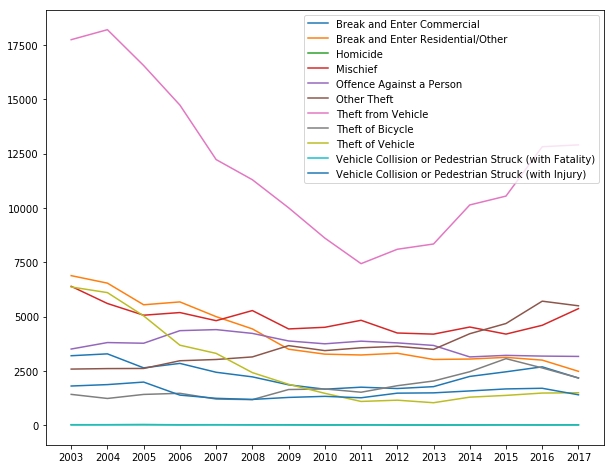

In [96]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
# ax.plot(year_type.columns,year_type.iloc[7])
for i in range(len(year_type.index)):
    plt.plot(year_type.columns,year_type.iloc[i],label = '%s'%year_type.index[i])
plt.legend()
ticks = [y for y in range(2003,2018)]
ax.set_xticks(ticks)
plt.show()

### Bike Theft

Let's focus on the *Theft of Bicycle*. Bike is allegedly one of the two most stole items in Vancouver (other being umbrella; it might seem weird but it's not consdering that it's always raining Vancouver, sometimes dubbed as 'Raincouver').

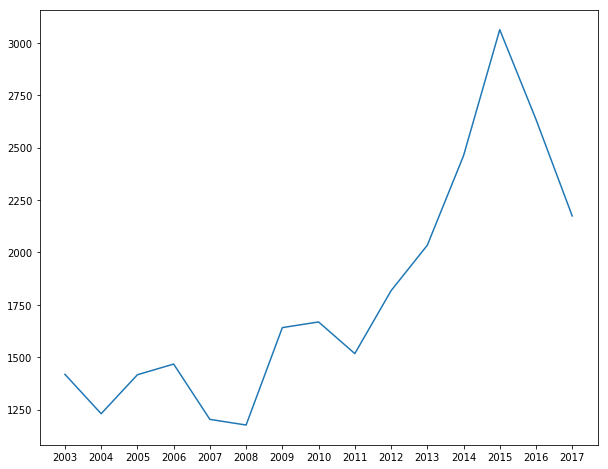

In [100]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(year_type.columns,year_type.loc['Theft of Bicycle'])
ticks = [y for y in range(2003,2018)]
ax.set_xticks(ticks)
plt.show()

As is evident from the graph above, we see a huge increase in the bike theft from 2011 but then a sharp decrease from 2015. This is attributed to a bike registration app called [Project 529](https://project529.com/garage/) which makes it easiers to track down stolen bikes.

Now, let's take a look at bike thefts in different months.

In [101]:
month_type = pd.crosstab(index=df['TYPE'],columns=df['MONTH'])

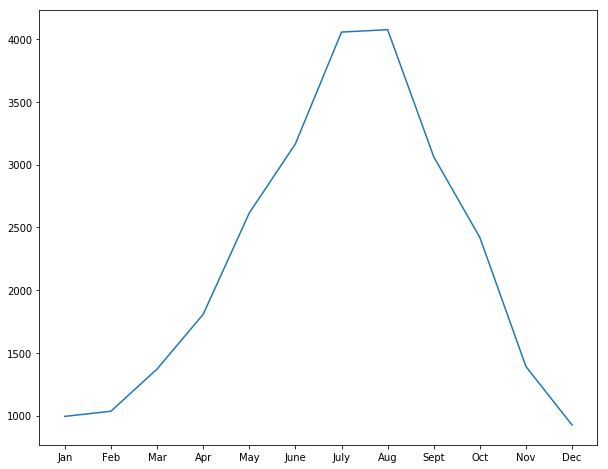

In [102]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(month_type.columns,month_type.loc['Theft of Bicycle'])
m = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
ticks = [m for m in range(1,13)]
ax.set_xticks(ticks)
ax.set_xticklabels(m)
plt.show()

Unsurprisingly, bikes are used most during summer and hence a sharp increase during the sumer months peaking around July and August.

This is the extent of my analysis so far and I will keep updating it.